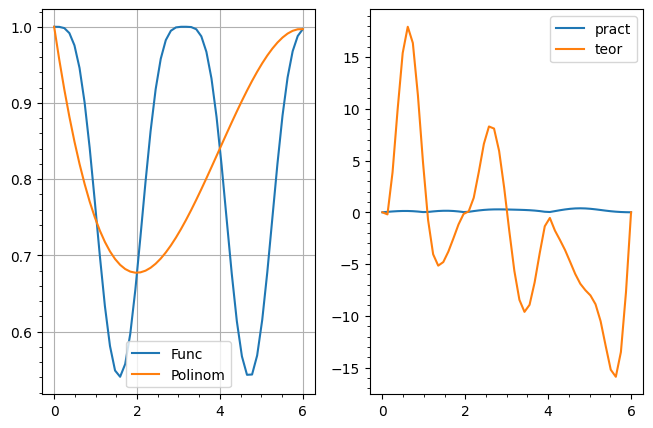

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp


def y(x):
    return np.cos(np.sin(x) ** 2)


def y4(x):
    return 8 * (np.cos(x) ** 2) * np.sin(np.sin(x) ** 2) - \
           8 * (np.sin(x) ** 2) * np.sin(np.sin(x) ** 2) + 88 * (np.cos(x) ** 2) * np.sin(x) * np.cos(np.sin(x) ** 2) - \
           12 * (np.sin(x) ** 4) * np.cos(np.sin(x) ** 2) - 48 * (np.cos(x) ** 2) * (np.sin(x) ** 4) * np.sin(np.sin(x)) - \
           12 * (np.cos(x) ** 4) * np.cos(np.sin(x) ** 2) + 48 * (np.cos(x) ** 4) * (np.sin(x) ** 2) * np.sin(np.sin(x) ** 2) + 16 * (np.cos(x) ** 4) * (np.sin(x) ** 4) * np.cos(np.sin(x) ** 2)


def L3(x):
    x1 = np.linspace(0, 6, 4)

    return 1.000000 * ((x - x1[1]) * (x - x1[2]) * (x - x1[3])) / ((x1[0] - x1[1]) * (x1[0] - x1[2]) * (x1[0] - x1[3])) + \
           0.677218 * ((x - x1[0]) * (x - x1[2]) * (x - x1[3])) / ((x1[1] - x1[0]) * (x1[1] - x1[2]) * (x1[1] - x1[3])) + \
           0.840414 * ((x - x1[0]) * (x - x1[1]) * (x - x1[3])) / ((x1[2] - x1[0]) * (x1[2] - x1[1]) * (x1[2] - x1[3])) + \
           0.996954 * ((x - x1[0]) * (x - x1[1]) * (x - x1[2])) / ((x1[3] - x1[0]) * (x1[3] - x1[1]) * (x1[3] - x1[2]))


x = np.linspace(0, 6)
y_values = y(x)
L3_values = L3(x)
y4_values = y4(x)

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.grid()
plt.plot(x, y_values, label='Func')

plt.plot(x, L3_values, label='Polinom')
plt.minorticks_on()
plt.legend()

plt.subplot(1, 3, 2)
R_prac = abs(L3_values - y_values)
plt.plot(x, R_prac, label='pract')
plt.minorticks_on()

x0 = 0
x1 = 2
x2 = 4
x3 = 6

R_teor = (y4_values/ 24) * abs((x - x0) * (x - x1) * (x - x2) * (x - x3))
plt.plot(x, R_teor, label='teor')
plt.legend()
plt.minorticks_on()


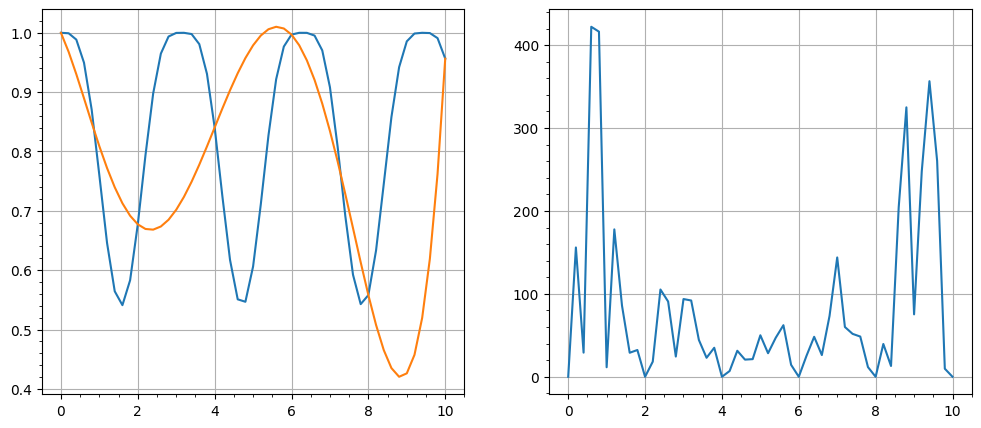

[0. 2. 4.]


In [ ]:
# Лагранж 5
from math import sin, cos
import matplotlib.pyplot as plt
import sympy as sp


def L3(x):
	rez_l = []
	for i in range(6):
		rez = 1
		for j in range(6):
			if i != j:
				rez *= (x-x_lst[j])/(x_lst[i]-x_lst[j])
		rez *= y(x_lst[i])
		rez_l.append(rez)
	return sum(rez_l)


def diff4(i):
	x = sp.symbols('x')
	func = sp.cos(sp.sin(x)**2)
	yprime = sp.diff(func, x, 6)
	yprime = yprime.subs({x: i})
	return yprime.n()


def y(x): return cos(sin(x)**2)


length = [i/10 for i in range(0, 101, 2)]

x_lst = [length[0], length[10], length[20], length[30], length[40], length[50]]


y_rez = [y(x) for x in length]


interp = []
for i in length:
	interp.append(L3(i))

R_teor = []
for x in length:
	R_teor.append(
		abs(diff4(x) / 720 * (x-x_lst[0]) * (x-x_lst[1]) * (x-x_lst[2]) * (x-x_lst[3]) * (x-x_lst[4]) * (x-x_lst[5])))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(length, y_rez)
plt.plot(length, interp)
plt.minorticks_on()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(length, R_teor)
plt.minorticks_on()
plt.grid(True)
plt.show()
plt.close()


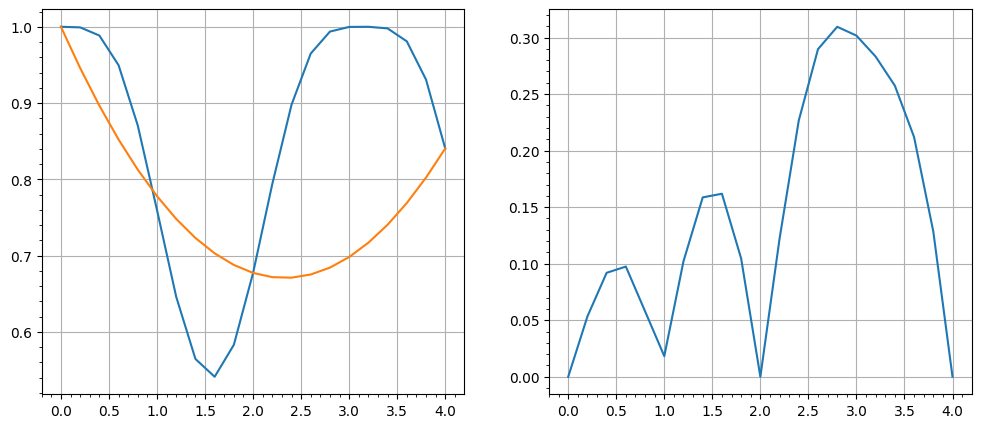

In [ ]:
# Гаус 2
from math import sin, cos
import matplotlib.pyplot as plt


def gauss(x):
    t = (x - x_lst[0])/h
    rez = y_rez[0] + delta_y0 * t + delta2_y0 * t * (t-1)/2
    return rez


def y(x):
    return cos(sin(x) ** 2)


length = [i/10 for i in range(0, 41, 2)]
x_lst = [length[0], length[10], length[-1]]
y_rez = [y(x) for x in length]

h = abs(x_lst[0] - x_lst[1])
delta_y0 = y_rez[10] - y_rez[0]
delta__y1 = y_rez[-1] - y_rez[10]
delta2_y0 = delta__y1 - delta_y0


interp = []
for x in length:
    interp.append(gauss(x))

R_prac = []
for i in range(len(interp)):
    R_prac.append(abs(y_rez[i] - interp[i]))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(length, y_rez)
plt.plot(length, interp)
plt.grid(True)
plt.minorticks_on()
plt.subplot(1, 2, 2)
plt.plot(length, R_prac)
plt.grid(True)
plt.minorticks_on()
plt.show()
plt.close()


4.5


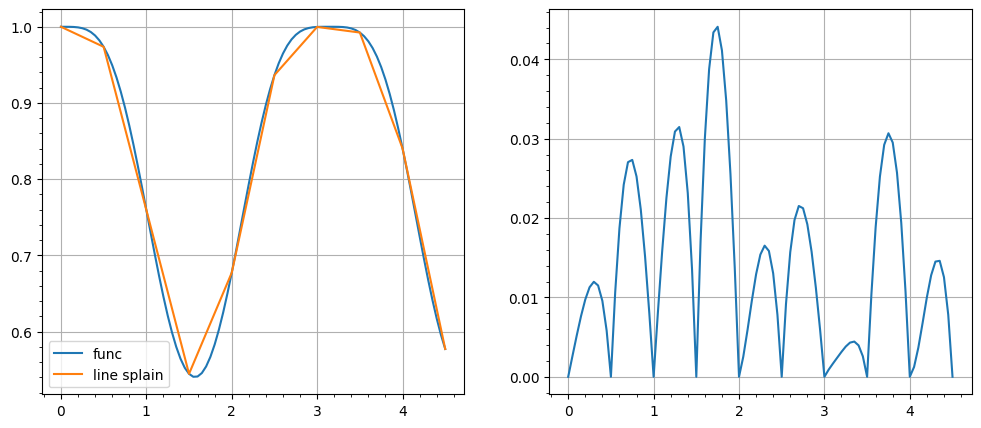

In [ ]:
# Линейный сплайн

from math import sin, cos
import matplotlib.pyplot as plt


def linear(x:list, y:list):
	rez = []
	for i in range(10):
		val = y[-1] + (x[-1]-x[i])*(y[0]-y[-1])/(x[-1]-x[0])
		rez.append(val)
	return rez


def y(x):
  return cos(sin(x) ** 2)


length = [i/1000 for i in range(0, 4501, 50)]
x_lst = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
print(x_lst[-1])
y_rez = [y(x) for x in length]
interp = []

for i in range(len(x_lst)-1):
	y = y_rez[i*10 : i*10 + 11]
	x = length[i*10: i*10+ 11]
	interp += linear(x, y)
interp += [y[-1] + (x[-1]-x[-1])*(y[0]-y[-1])/(x[-1]-x[0])]



R_prac = []
for i in range(len(interp)):
    R_prac.append(abs(y_rez[i] - interp[i]))
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(length, y_rez, label='func')
plt.plot(length, interp, label='line splain')
plt.grid(True)
plt.legend()
plt.minorticks_on()
plt.subplot(1, 2, 2)
plt.plot(length, R_prac)
plt.grid(True)
plt.minorticks_on()
plt.show()
plt.close()


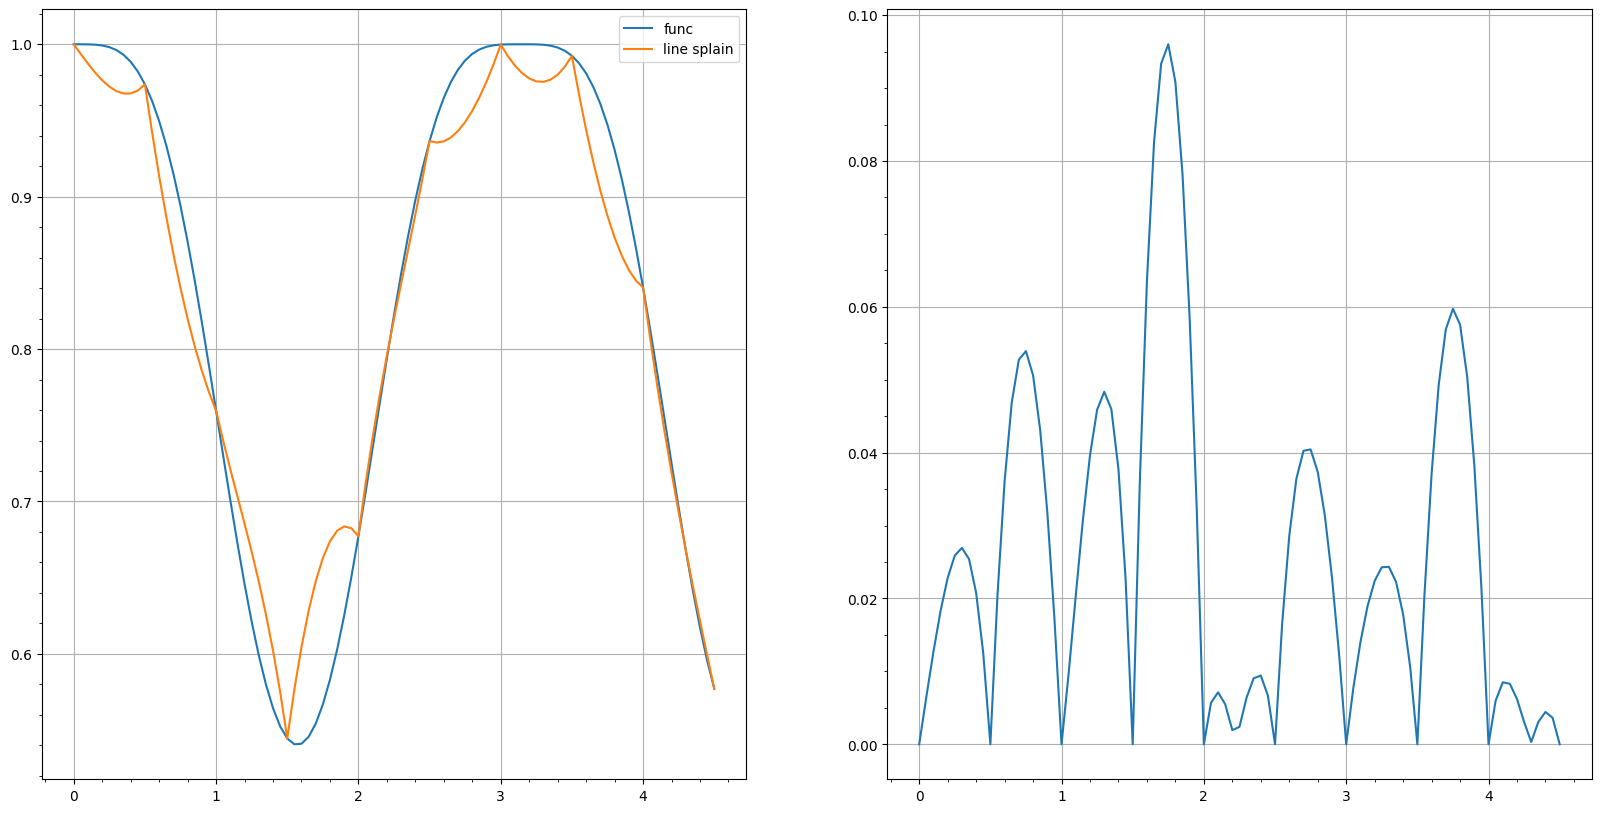

In [ ]:
# Кубический сплайн

from math import sin, cos
import matplotlib.pyplot as plt
import numpy as np


def cubesplain(x: list, j: int):
	result = []
	for i in range(10):
		val = a[j+1] + b[j] * (x[-1] - x[i]) +  (c[j+1] * (x[-1] - x[i]) ** 2) / 2 + (d[j] * (x[-1] -x[i]) ** 3) / 6
		result.append(val)
	return result


def y(x):
  return cos(sin(x) ** 2)


length = [i/1000 for i in range(0, 4501, 50)]
x_list = np.arange(0, 4.51, 0.5)

y_result = [y(x) for x in length]

h = x_list[1] - x_list[0]
alpha = h
betta = 2 * (h + h)
gamma = h

a= [y(x) for x in x_list]

fi =[]

for i in range(1, len(x_list) - 1):
  result = 6 * ((a[i+1] - a[i])/h -(a[i] - a[i-1])/h)
  fi.append(result)

pi = [0]
qi = [0]
for i in range(1, len(x_list) - 1):
  result = - gamma / (betta + alpha * pi[i-1])
  pi.append(result)
  result = - (fi[i-1] - alpha * qi[i - 1]) / (betta + alpha * pi[i-1])
  qi.append(result)

c = [0]
k = 0
for i in range(len(x_list) - 1, 1, -1):
  result = pi[i-1] * c[k] + qi[i-1]
  c.append(result)
  k += 1
c.append(0)
c.reverse()

d = []
for i in range(1, len(x_list)):
  result = (c[i-1] - c[i]) / h
  d.append(result)

b = []
for i in range(1, len(x_list)):
  result = (a[i-1] - a[i])/h - c[i] * h / 2 - (c[i-1] - c[i]) * h / 6
  b.append(result)


interp = []
k = 0
for i in range(len(x_list) - 1):
    x = length[i * 10: i * 10 + 11]
    interp += cubesplain(x, k)
    k += 1
interp += [a[-1]]



R_prac = []
for i in range(len(interp)):
    R_prac.append(abs(y_result[i] - interp[i]))
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(length, y_result, label='func')
plt.plot(length, interp, label='line splain')
plt.grid(True)
plt.legend()
plt.minorticks_on()
plt.subplot(1, 2, 2)
plt.plot(length, R_prac)
plt.grid(True)
plt.minorticks_on()
plt.show()
plt.close()
